In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Analisis_Sentimen_DBS/Analisis-Sentimen/cleaned_dataset.csv")
df

,stemmed_review,label
0,bagus,positif
1,shopi banget,positif
2,nang cepat santun trimakasih,positif
3,puas belanja shopee,positif
4,akun paylater nonaktif ga alas pakai tahun skr...,negatif
...,...,...
9995,oke,positif
9996,lumayan,positif
9997,aplikasi bagus,positif
9998,amana,positif


In [4]:
df_clean = df.dropna(subset=['stemmed_review', 'label'])

In [5]:
# Split data
X = df_clean['stemmed_review']
y = df_clean['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [8]:
# Pelatihan model SVM
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

In [9]:
# Evaluasi
y_pred = svm_model.predict(X_test_tfidf)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.9917269906928645
Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.99      0.99      0.99       359
      netral       1.00      0.88      0.94        83
     positif       0.99      1.00      0.99      1492

    accuracy                           0.99      1934
   macro avg       0.99      0.96      0.97      1934
weighted avg       0.99      0.99      0.99      1934



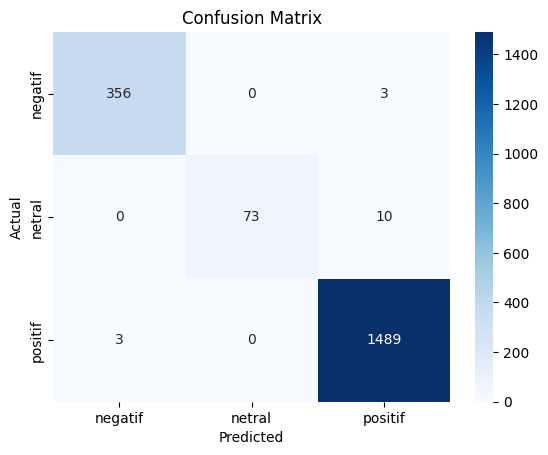

In [12]:
# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Inference untuk review baru
sample_review = ["Aplikasi ini sangat membantu dan mudah digunakan!"]
sample_vector = tfidf.transform(sample_review)
predicted_sentiment = svm_model.predict(sample_vector)

print("Hasil Sentimen:", predicted_sentiment[0])

Hasil Sentimen: positif
